### Importy

In [1]:
import os
os.chdir('d:/Projekty/LBN-INZ/CODE/model_training/')
print(os.getcwd())

d:\Projekty\LBN-INZ\CODE\model_training


In [2]:
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
from scripts.train_utilities import *

In [3]:
cols_news = ['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader',
       'mean_future','mean_influential', 'mean_trustworthy', 'mean_clickbait' 
         ]

### Połączenie News + FE

In [4]:
prefix = "BTC-USD"
df_news_path = "BTCUSD_full_agg_8.csv"

In [5]:
df_news = pd.read_csv("csv/"+prefix+"/"+df_news_path)
df_finance = pd.read_csv("csv/finance_all.csv")

połączenie z newsami + uzupełnienie braków

In [6]:
df_m = create_merged_df(df_finance, df_news, prefix)

dorobienie ramki bez weekendu

In [7]:
df_with_weekends = df_m.copy()
df_without_weekends = df_m.copy()

df_without_weekends = apply_weighted_weekend_news(df_without_weekends,'Date', cols_news, weights=[0.6,0.2,0.2])

wyliczenie cech

In [8]:
df_without_weekends = calculate_technical_indicators(df_without_weekends,'Date',prefix+'_Open',prefix+ '_High',prefix+ '_Low',
    prefix+'_Close',prefix+ '_Volume','^GSPC_Close')
df_with_weekends = calculate_technical_indicators(df_with_weekends,'Date',prefix+'_Open',prefix+ '_High',prefix+ '_Low',
    prefix+'_Close',prefix+ '_Volume','^GSPC_Close',True)

In [9]:
df_with_weekends.describe()

,future,influential,trustworthy,not clickbait,finbert_Score,bart_Score,vader_Score,future_finbert,future_bart,future_vader,...,log_return_gspc_7,log_return_gspc_14,log_return_gspc_28,daily_variation,high_close_pressure,low_open_pressure,low_norm,close_norm,high_norm,open_norm
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,...,1173.000000,1166.000000,1152.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,0.265659,0.748357,0.612560,0.218903,0.002083,0.509867,0.116350,-0.003068,0.175471,0.038646,...,0.001611,0.003340,0.006518,0.045285,0.020812,-0.022980,0.983320,1.007814,1.028699,1.006327
min,0.000000,0.000000,0.000000,0.000000,-0.967333,0.000000,-0.939300,-0.461243,0.000000,-0.432011,...,-0.107802,-0.130239,-0.129153,0.003588,0.000000,-0.285563,0.611133,0.737037,0.813760,0.752519
25%,0.179039,0.930589,0.597697,0.178900,-0.162940,0.256981,0.000000,-0.063106,0.061815,0.000000,...,-0.012145,-0.014437,-0.021057,0.023822,0.006204,-0.029962,0.948335,0.969309,0.988035,0.973179
50%,0.330168,0.970446,0.773926,0.263454,0.000000,0.610467,0.039821,0.000000,0.202460,0.007421,...,0.003262,0.007224,0.014519,0.037653,0.012829,-0.014301,0.985335,1.002202,1.020823,1.002312
75%,0.374962,0.980191,0.832362,0.303117,0.159097,0.740176,0.299494,0.053344,0.257486,0.100024,...,0.016311,0.024142,0.037275,0.056725,0.028179,-0.006154,1.020133,1.044794,1.062648,1.039004
max,0.497691,0.998414,0.989868,0.488007,0.934275,0.996082,0.968600,0.457677,0.485660,0.463266,...,0.070679,0.092059,0.114863,0.299561,0.161129,0.000000,1.216007,1.284588,1.309141,1.243415
std,0.157466,0.410052,0.342813,0.130109,0.366789,0.319480,0.311824,0.134122,0.118712,0.113461,...,0.024038,0.032673,0.043619,0.032357,0.022442,0.027263,0.067090,0.070317,0.067047,0.061626


In [10]:
df_with_weekends.to_csv("csv/"+prefix+"/"+prefix+"_with_weekends.csv", index=False)
df_without_weekends.to_csv("csv/"+prefix+"/"+prefix+"_without_weekends.csv", index=False)

In [11]:
df_with_weekends.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       '^GSPC_Volume', 'EURUSD=X_Close', 'BTC-USD_Open', 'BTC-USD_High',
       'BTC-USD_Low', 'BTC-USD_Close', 'BTC-USD_Volume', 'mean_future',
       'mean_influential', 'mean_trustworthy', 'mean_clickbait', 'norm_rsi_14',
       'norm_rsi_gspc_14', 'norm_slowk_14', 'vwap_14', 'norm_roc_14',
       'log_return_1', 'log_return_7', 'log_return_14', 'log_return_28',
       'log_return_gspc_1', 'log_return_gspc_7', 'log_return_gspc_14',
       'log_return_gspc_28', 'daily_variation', 'high_close_pressure',
       'low_open_pressure', 'low_norm', 'close_norm', 'high_norm',
       'open_norm'],

In [12]:
close_price_statistics_by_year(df_with_weekends, 'Date', prefix+'_Close')

,Year,Min,Max,Mean,Std,Percentile_25,Percentile_50,Percentile_75,Mean_Abs_Diff_1D,Mean_Abs_Diff_1W,Mean_Abs_Diff_2W,Mean_Abs_Diff_1M,Mean_Abs_Diff_2M
0,2020,10131.516602,29001.720703,15320.939365,4919.976703,10921.332031,13695.664062,18637.002930,363.199380,982.092389,1523.258344,2640.092706,5115.090832
1,2021,29374.152344,67566.828125,47436.932021,9787.634672,38347.062500,47783.359375,56216.183594,1426.326557,3313.745923,4777.684268,6790.829136,11376.344467
2,2022,15787.284180,47686.812500,28197.754099,10198.035764,19546.849609,23164.628906,39105.148438,653.448641,1588.926311,2343.977932,3296.080201,5082.260204
3,2023,16625.080078,37880.582031,27404.916176,4156.414066,25809.493164,27302.351562,29452.230469,411.273342,1008.105427,1531.146472,2288.663610,3701.091636


### Train Val Test + Normalizacja

In [13]:
df_with_weekends.drop(columns=[prefix+'_Open', prefix+'_High', prefix+'_Low', prefix+'_Close', '^GSPC_Close','vwap_14'], inplace=True) 

In [15]:
df_with_weekends['target_1'] = df_with_weekends['log_return_1'].shift(-1)
df_with_weekends['target_7'] = df_with_weekends['log_return_7'].shift(-7)
df_with_weekends['target_14'] = df_with_weekends['log_return_14'].shift(-14)
df_with_weekends['target_28'] = df_with_weekends['log_return_28'].shift(-28)

In [17]:
train_set, val_set, test_set = split_data(df_with_weekends, 'Date', '2023-08-05', '2023-09-30', start_date_train = '2021-01-01')
print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

(946, 50)
(56, 50)
(56, 50)


In [18]:
cols_min_max = ['^GSPC_Volume', prefix+'_Volume',
'daily_variation', 'high_close_pressure', 'low_open_pressure',
'low_norm', 'close_norm', 'high_norm', 'open_norm']

train_set, scaler_min_max = min_max_scale(train_set,'Date', cols_min_max, train_data=True, scaler=None)
val_set = min_max_scale(val_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)
test_set = min_max_scale(test_set,'Date', cols_min_max, train_data=False, scaler=scaler_min_max)

In [19]:
train_set.describe().T

,count,mean,min,25%,50%,75%,max,std
future,946.0,0.290544,0.0,0.260274,0.33976,0.381805,0.497691,0.141816
influential,946.0,0.818723,0.0,0.959155,0.973038,0.981341,0.998414,0.355947
trustworthy,946.0,0.669888,0.0,0.703881,0.783796,0.839277,0.989868,0.30082
not clickbait,946.0,0.240086,0.0,0.22059,0.26955,0.3085,0.479907,0.117409
finbert_Score,946.0,-0.000403,-0.967333,-0.202396,0.0,0.187699,0.934275,0.395742
bart_Score,946.0,0.5578,0.0,0.448957,0.631174,0.754532,0.996082,0.294781
vader_Score,946.0,0.119399,-0.9393,-0.002344,0.07287,0.317789,0.9686,0.330035
future_finbert,946.0,-0.004464,-0.461243,-0.076175,0.0,0.063818,0.457677,0.143623
future_bart,946.0,0.192079,0.0,0.125079,0.211156,0.264739,0.48566,0.112653
future_vader,946.0,0.039648,-0.432011,-0.002841,0.021504,0.107047,0.438665,0.119656


In [20]:
train_set.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', 'EURUSD=X_Close',
       'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait',
       'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'norm_roc_14',
       'log_return_1', 'log_return_7', 'log_return_14', 'log_return_28',
       'log_return_gspc_1', 'log_return_gspc_7', 'log_return_gspc_14',
       'log_return_gspc_28', 'target_1', 'target_7', 'target_14', 'target_28',
       'minmax_^GSPC_Volume', 'minmax_BTC-USD_Volume',
       'minmax_daily_variation', 'minmax_high_close_pressure',
       'minmax_low_open_pressure', 'minmax_low_norm', 'minmax_close_norm',
       'minmax_high_norm

In [21]:
train_set.to_csv("csv/"+prefix+"/train_set_full.csv", index=False)
test_set.to_csv("csv/"+prefix+"/test_set_full.csv", index=False)
val_set.to_csv("csv/"+prefix+"/val_set_full.csv", index=False)

### Analiza Targetu

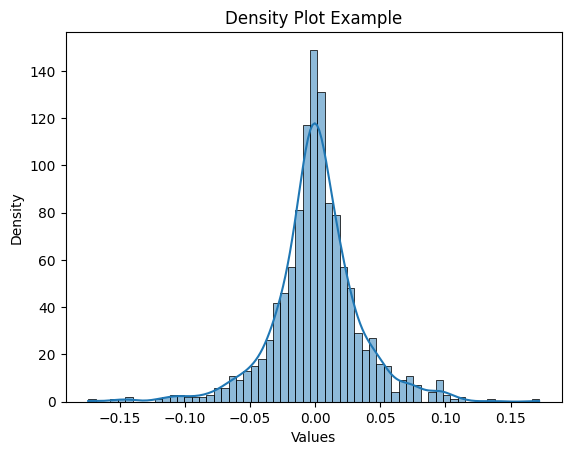

In [22]:
plot_density(df_with_weekends['log_return_1'], title='Density Plot Example', xlabel='Values')

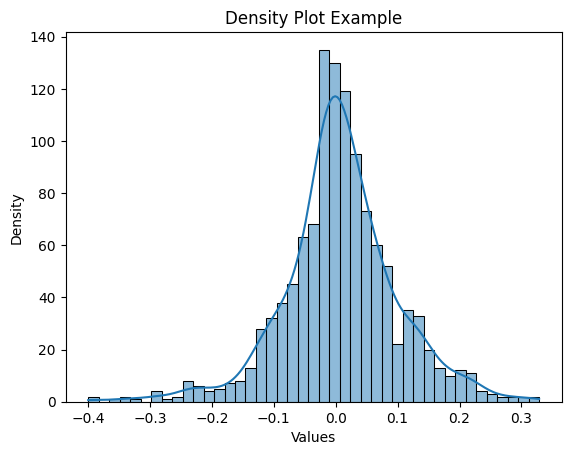

In [23]:
plot_density(df_with_weekends['log_return_7'], title='Density Plot Example', xlabel='Values')

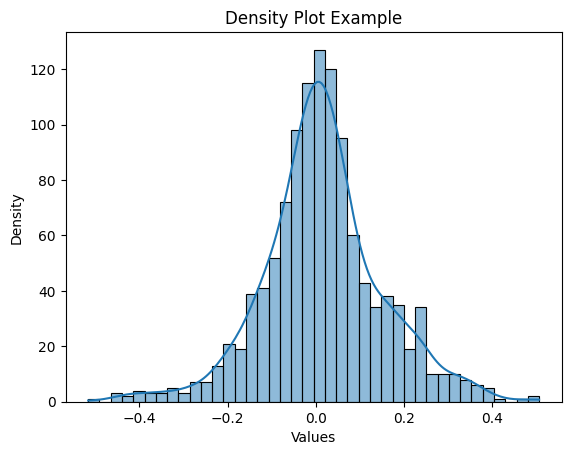

In [24]:
plot_density(df_with_weekends['log_return_14'], title='Density Plot Example', xlabel='Values')

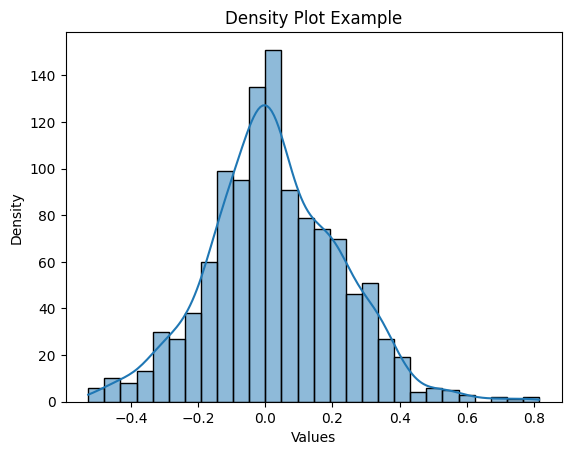

In [25]:
plot_density(df_with_weekends['log_return_28'], title='Density Plot Example', xlabel='Values')